In [6]:
import sys
import warnings

sys.path.append('../src/')
warnings.filterwarnings("ignore")

from server import Server
from utils import plot_exp

### First experiment : impact of federated learning

In [7]:
lr = 0.01
epochs = 100
nr_training_rounds = 100
batch_size = 8
range_nr_clients = [1, 5, 10]

In [3]:
experiment_losses, experiment_accs = [], []
for nr_clients in range_nr_clients:
    print(f"### Number of clients : {nr_clients} ###\n\n")
    server = Server(
        nr_clients=nr_clients,
        nr_training_rounds=nr_training_rounds,
        lr=lr,
        epochs=epochs,
        data='MED',
        batch_size=batch_size,
        max_grad_norm=0,
        epsilon=0,
        n_accumulation_steps=0,
        is_private=False,
        is_parallel=False,
        device=None,
        verbose='server')
    test_losses, test_accs = server(early=True, patience=8)
    experiment_losses.append(test_losses)
    experiment_accs.append(test_accs)

### Number of clients : 1 ###


--- Configuration ---
nr_clients: 1
nr_training_rounds: 100
lr: 0.01
epochs: 100
data: MED
batch_size: 8
max_grad_norm: 0
epsilon: 0
n_accumulation_steps: 0
is_parallel: False
is_private: False
device: <class 'torch.device'>
verbose: server
--- Training ---
Round 1, test_loss: 0.7452, test_acc: 0.9166666666666666
Validation loss decreased (inf --> 0.745196).  Saving model ...
Round 2, test_loss: 0.8995, test_acc: 0.8333333333333334
EarlyStopping counter: 1 out of 8
Round 3, test_loss: 0.4485, test_acc: 1.0
Validation loss decreased (0.745196 --> 0.448470).  Saving model ...
Round 4, test_loss: 0.3738, test_acc: 0.9166666666666666
Validation loss decreased (0.448470 --> 0.373771).  Saving model ...
Round 5, test_loss: 0.3786, test_acc: 1.0
EarlyStopping counter: 1 out of 8
Round 6, test_loss: 0.2517, test_acc: 1.0
Validation loss decreased (0.373771 --> 0.251699).  Saving model ...
Round 7, test_loss: 0.2265, test_acc: 1.0
EarlyStopping counter: 1 out of 

Round 22, test_loss: 0.3885, test_acc: 1.0
EarlyStopping counter: 1 out of 8
Round 23, test_loss: 0.3789, test_acc: 1.0
EarlyStopping counter: 2 out of 8
Round 24, test_loss: 0.3262, test_acc: 1.0
EarlyStopping counter: 3 out of 8
Round 25, test_loss: 0.3117, test_acc: 1.0
EarlyStopping counter: 4 out of 8
Round 26, test_loss: 0.3861, test_acc: 1.0
EarlyStopping counter: 5 out of 8
Round 27, test_loss: 0.3239, test_acc: 1.0
EarlyStopping counter: 6 out of 8
Round 28, test_loss: 0.2863, test_acc: 1.0
Validation loss decreased (0.360441 --> 0.286297).  Saving model ...
Round 29, test_loss: 0.2904, test_acc: 1.0
EarlyStopping counter: 1 out of 8
Round 30, test_loss: 0.3298, test_acc: 1.0
EarlyStopping counter: 2 out of 8
Round 31, test_loss: 0.2946, test_acc: 1.0
EarlyStopping counter: 3 out of 8
Round 32, test_loss: 0.2769, test_acc: 1.0
EarlyStopping counter: 4 out of 8
Round 33, test_loss: 0.2717, test_acc: 1.0
EarlyStopping counter: 5 out of 8
Round 34, test_loss: 0.3558, test_acc: 1.

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.dpi'] = 100

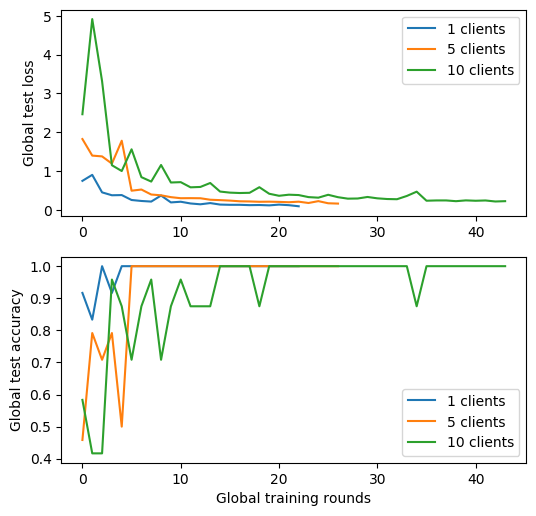

In [5]:
names = [f'{i} clients' for i in range_nr_clients]
plot_exp(experiment_losses, experiment_accs, names)

### Second experiment : impact of differential privacy

In [ ]:
lr = 0.01
epochs = 100
nr_training_rounds = 100
batch_size = 8
virtual_batch_size = 16
assert virtual_batch_size % batch_size == 0
n_accumulation_steps = int(virtual_batch_size / batch_size)
nr_clients = 1
range_epsilon = [100000]

In [ ]:
experiment_losses, experiment_accs = [], []
for epsilon in range_epsilon:
    print(f"### epsilon : {epsilon} ###\n\n")
    server = Server(
        nr_clients=nr_clients,
        nr_training_rounds=nr_training_rounds,
        lr=lr,
        epochs=epochs,
        data='MED',
        batch_size=batch_size,
        max_grad_norm=1000,
        epsilon=epsilon,
        n_accumulation_steps=n_accumulation_steps,
        is_private=False,
        is_parallel=False,
        device=None,
        verbose='server')
    test_losses, test_accs = server(early=False, patience=20)
    experiment_losses.append(test_losses)
    experiment_accs.append(test_accs)

In [ ]:
names = [f'epislon = {i}' for i in range_epsilon]
plot_exp(experiment_losses, experiment_accs, names)